In [5]:
import numpy as np
import torch
from torchvision import transforms
import torch.utils.data as data
import matplotlib.pyplot as plt
import random
import nltk

from data_loader import *

# Watch for any changes in vocabulary.py, data_loader.py or model.py, and re-load it automatically.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225))
])

img_path = '../data/flickr30k-images'
ann_path = '../data/results_20130124.token'

dataset = Flickr30kData(img_root=img_path,
                       ann_file=ann_path,
                       transform=transform,
                       fetch_mode='retrieval',
                       mode="train")

29775


In [25]:
# Batch size should always be 1
data_loader = data.DataLoader(dataset=dataset,
                              batch_size=100,
                              shuffle=True)

dataloader_iterator = iter(data_loader)

for i in range(len(dataset)):
    img, caption_gloves, caption = next(dataloader_iterator)
    break

In [26]:
len(dataset)

29775

### Visualizing the Flickr30K data and target

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


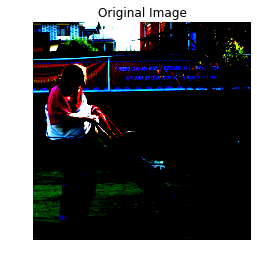

8


In [27]:
plt.imshow(img[0].permute(1, 2, 0))
plt.title('Original Image')
plt.axis('off')
plt.show()

print(len(caption[0].split(" ")))

In [28]:
caption_gloves.shape

torch.Size([100, 22, 300])